# Movie ratings sentiment prediction

    We are given a dataset in IMDB-Dataset.csv constituted by two columns. A text review column
    and a sentiment column. Review column is constituted by text written by a user to give
    comments about a movie. The sentiment column contains users’ sentiment about the movie,
    0 for negative sentiment, and 1 for positive sentiment.
    The goal of this exercise is to implement in Keras a model to predict sentiment from word
    occurrences

## Packages

In [165]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from wordcloud import WordCloud

## Load Dataset

In [116]:
file = r'C:\Users\chris\OneDrive\Bureau\Exam\IMDB-Dataset.csv'
df = pd.read_csv(file)
print("IMDB-Data", df.head() )
print("Data set shape", df.shape)

IMDB-Data                                               review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. The filming tec...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
Data set shape (50000, 2)


In [117]:
df.shape

(50000, 2)

## Part 1 : Neural Network Model

### Transformation of the text reviews columns into vectorized word counts

In [128]:
count_vectorizer = CountVectorizer( min_df=20, analyzer = 'word', token_pattern=r'\b[^\d\W]+\b')
features = count_vectorizer.fit_transform(df.review)

In [119]:
features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Format sentiment entries to one-hot format

In [135]:
def one_hot_encode(categorical_labels):
    
    data = categorical_labels
    values = np.array(data)
    
    #integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    
    #binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    
    encoded_labels = onehot_encoder.fit_transform(integer_encoded)
    
    return encoded_labels

In [136]:
label=one_hot_encode(df.sentiment)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Split the dataset into a training and an evaluation set

In [138]:
#Train set validation set 
x=features
x_train,x_test,y_train,y_test = train_test_split(x,label,test_size=0.2,random_state=0)

print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (40000, 17668)
x_test (10000, 17668)
y_train (40000, 2)
y_test (10000, 2)


In [140]:
(x_train

<40000x17668 sparse matrix of type '<class 'numpy.int64'>'
	with 5310027 stored elements in Compressed Sparse Row format>

In [141]:
type(x_train)

scipy.sparse.csr.csr_matrix

### Model Buidling : Two hidden layers neural network

In [142]:
# Model definition
def mlp_model(input_size,size_layer1,size_layer2): 
    
    model = tf.keras.Sequential()
    
    model.add(Dense(size_layer1,input_shape =(input_size,), activation = 'relu'))
    
    model.add(Dense(size_layer2,activation = 'relu'))
    
    model.add(Dense(2,activation='sigmoid'))  #We only have 2 classes so we used the sigmoïd function
    
    model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001 ), metrics=['acc'])
    
    return model 

### Model Implementation

In [143]:
# Model implementation
size_layer1 = 512
size_layer2 = 256

model = mlp_model(x_train.shape[1],size_layer1, size_layer2)

history=model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 119s 3ms/sample - loss: 0.3072 - acc: 0.8728 - val_loss: 0.2872 - val_acc: 0.8730
Epoch 2/2
40000/40000 [==============================] - 119s 3ms/sample - loss: 0.1579 - acc: 0.9377 - val_loss: 0.2965 - val_acc: 0.8922


# Part 2 : DataVizualisation

### one hot encoded vocabulary matrix

In [151]:
count_matrix= np.identity(len(count_vectorizer.vocabulary_))

### vocabulary matrix prediction 

In [160]:
matrix_pred = model.predict(count_matrix)
matrix_pred.shape

(17668, 2)

### Word Cloud

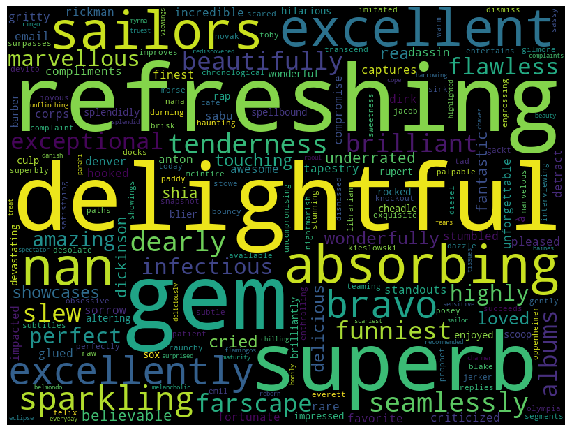

In [167]:
#word-cloud where each word is associated to the ratio positivity score
count_sum = np.sum(features,axis=0)
word_index_map = count_vectorizer.vocabulary_
word_counts = {}

for word in word_index_map:
    index = word_index_map[word]
    word_counts[word] = matrix_pred[index,1]

wordcloud = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()   

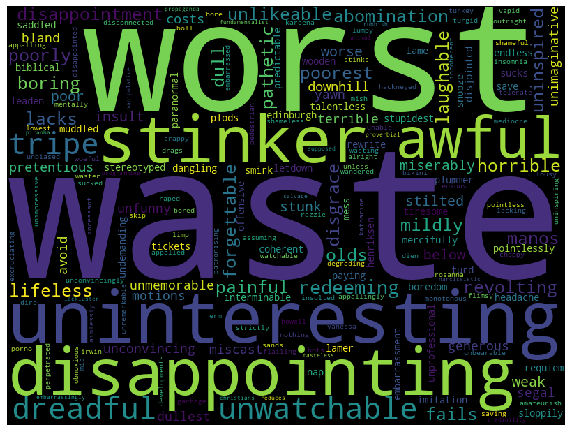

In [168]:
# word-cloud where each word is associated to the Negative positivity score

count_sum = np.sum(features,axis=0)
word_index_map = count_vectorizer.vocabulary_
word_counts = {}

for word in word_index_map:
    index = word_index_map[word]
    word_counts[word] = matrix_pred[index,0]

wordcloud = WordCloud(width=800, height=600, relative_scaling=0.5).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()   